# **Load Dataset & libraries**
* Please note that you may need to use the scipy-loadmap library to import the dataset

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import scipy.io
from prettytable import PrettyTable
import matplotlib.pyplot as plt

# This line is for validation
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [3]:
# Import dataset
file_name = "UCI_ecoli_data.mat"
data = scipy.io.loadmat(file_name)

In [4]:
# mat 파일 타입 확인
print(type(data))

<class 'dict'>


### For more details on the dataset, please refer to the following:  
* **xTrain**: Design matrix for training. Data type is float.   
* **yTrain**: Response vector for training. Data type is integer.   
* **xTest**: Design matrix for testing. Data type is float
* **yTest**: Response vector for testing. Data type is integer

In [5]:
# Check the dataset in mat file
for i in data:
    print(i)

__header__
__version__
__globals__
yTest
xTrain
xTest
yTrain


In [6]:
yTest = data["yTest"]
xTrain = data["xTrain"]
xTest = data["xTest"]
yTrain = data["yTrain"]

In [7]:
# Check the shape of each data
print("Shape of each dataset")
print("yTest: ", yTest.shape)
print("xTrain: ", xTrain.shape)
print("xTest: ", xTest.shape)
print("yTrain: ", yTrain.shape)

Shape of each dataset
yTest:  (109, 1)
xTrain:  (218, 5)
xTest:  (109, 5)
yTrain:  (218, 1)


# **Let's implement Gaussian Naive Bayes Classification**

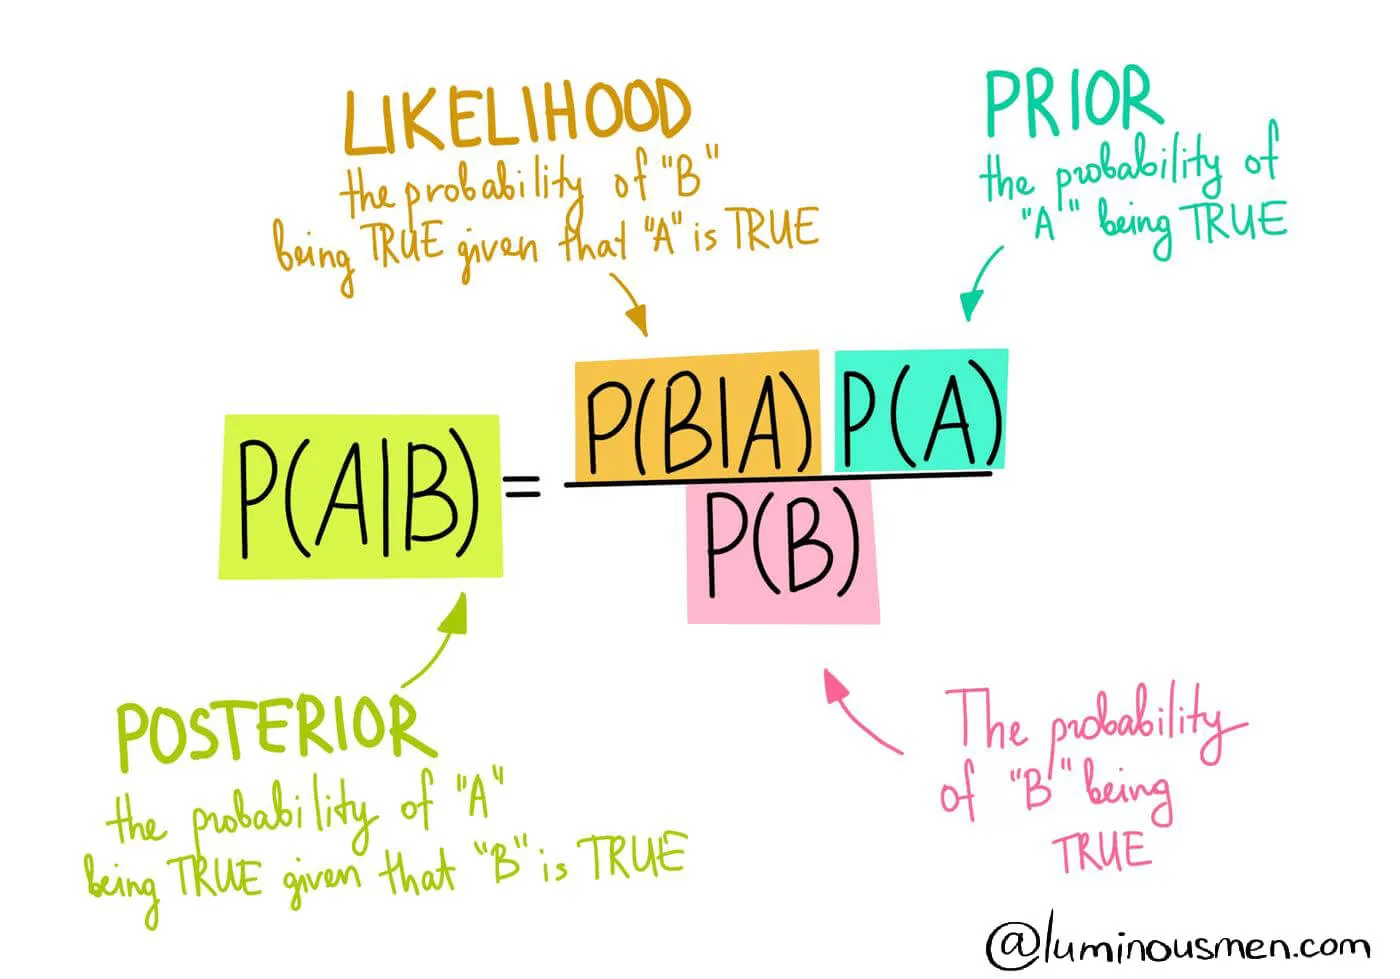
Source from: https://medium.com/@rangavamsi5/na%C3%AFve-bayes-algorithm-implementation-from-scratch-in-python-7b2cc39268b9

Here, We are going to calculate the conditional probability of a data sample(x) belonging to a given class (y) by Bayes Theorem.

Hence, we are going to calculate...

$$
P(y|X) = \frac{P(X|y) \times P(y)}{P(X)}  \\
$$

* ${X}$ : Entire training set (${m}$, ${n}$)  
* ${n}$ : The number of features (column)  
* ${m}$: The number of data samples (row)  
* ${y}$ : classes (${c}$, 1)  
* ${c}$ : the number of classes  

Since ${X}$ composed of ${m}$ samples with ${n}$ features, we have to calculate the conditional probability of predicted class ${y}$ is true class ${Y}$ given ${x_i}$ is observed. That is...

$$
P(Y = y|x_1,...,x_m) = \frac{P(x_1,...,x_m|y) \times P(y)}{P(x1,...,x_m)} \\
$$

* ${x}$ : A data sample (1, ${n}$)
* ${Y}$: true class
* ${y}$: predicted class

## 1. Learning class priors
### Create a function  𝑝 = 𝑝𝑟𝑖𝑜𝑟(𝑦𝑇𝑟𝑎𝑖𝑛) to calculate prior probabilities of the classes. 

\begin{aligned}

{Prior\ Probability = P(y) = \frac{f_i}{N}} \\
{f} : the\ frequency\ of\ given\ class(c_i) \\
{N} : the\ total\ number\ of\ overall\ classes \\
  
\end{aligned}

Compute the probabilities using the function

In [8]:
def prior(yTrain):
    '''
    - c: number of classes
    - p: c X 1 vector where p_i is the prior probability of class i
    
    '''
    
    classes = np.unique(yTrain)
    p = np.zeros((len(classes), 1))

    for index, i in enumerate(classes):
        total = np.sum(yTrain == i)
        p[index, 0] = total/len(yTrain)

    return p

print them with a format of 𝑐 × 1  vector where  ${𝑝_i}$  is the prior probability of class 𝑖. 
  * Here,  𝑐  is the number of classes.

In [30]:
p = prior(yTrain)
p

array([[0.47247706],
       [0.23394495],
       [0.14220183],
       [0.10091743],
       [0.05045872]])

In [31]:
p.shape

(5, 1)

## 2. Learning  class-conditional  feature  probabilities 
### Create  a  function  𝑀, 𝑉 = 𝑙𝑖𝑘𝑒𝑙𝑖ℎ𝑜𝑜𝑑 (𝑥𝑇𝑟𝑎𝑖𝑛, 𝑦𝑇𝑟𝑎𝑖𝑛). 
Compute the conditional mean and variance of the features using the function and print them.   

In [32]:
def likelihood(xTrain, yTrain):
    '''
    - 𝑀: an  𝑚×𝑐  matrix where M[i,j]is the conditional mean of feature 𝑖 given class 𝑗. 
    - 𝑉: an  𝑚×𝑐  matrix where V[i,j] is the conditional variance of feature  𝑖  given class  𝑗. 
    - 𝑚: the number of features
    '''

    classes = np.unique(yTrain)
    m = xTrain.shape[1]
    c = len(classes)
    M = np.zeros((m, c))
    V = np.zeros((m, c))

    for i in range(m):
        array = np.concatenate((xTrain[:, i].reshape(-1,1), yTrain), axis = 1)
        df = pd.DataFrame(array)
        df = df.rename(columns = {1: "class"})
        
        for j in range(c):
            
            M[i,j] = df[df["class"] == classes[j]][0].mean()
            V[i,j] = df[df["class"] == classes[j]][0].var()
        
    return M, V

𝑀  is an  𝑚×𝑐  matrix where  ${𝑀_{i,j}}$  is the conditional mean of feature  𝑖  given class  𝑗.  
𝑉  is an  𝑚×𝑐  matrix where  ${V_{i,j}}$ is the conditional variance of feature  𝑖  given class  𝑗.  

* Here,  𝑚  is the number of features. 

In [33]:
M, V = likelihood(xTrain, yTrain)
print(f"Shape of mean matrix: {M.shape}")
print(f"Shape of variance matrix: {V.shape}")

Shape of mean matrix: (5, 5)
Shape of variance matrix: (5, 5)


In [34]:
col = ["class 1", "class 2", "class 3", "class 4", "class 5"]
ind = ["feature 1", "feature 2", "feature 3", "feature 4", "feature 5"]
M_df = pd.DataFrame(M, columns=col, index = ind)
M_df

,class 1,class 2,class 3,class 4,class 5
feature 1,0.359417,0.471765,0.651290,0.739091,0.689091
feature 2,0.407282,0.505490,0.715806,0.470455,0.690000
feature 3,0.453398,0.526863,0.430323,0.581364,0.767273
feature 4,0.307961,0.755490,0.470000,0.749091,0.481818
feature 5,0.393010,0.710196,0.387097,0.769091,0.315455


In [35]:
col = ["class 1", "class 2", "class 3", "class 4", "class 5"]
ind = ["feature 1", "feature 2", "feature 3", "feature 4", "feature 5"]
V_df = pd.DataFrame(V, columns=col, index = ind)
V_df

,class 1,class 2,class 3,class 4,class 5
feature 1,0.015284,0.043487,0.011178,0.011361,0.004609
feature 2,0.007710,0.007985,0.022065,0.009957,0.011900
feature 3,0.009111,0.016654,0.006583,0.004127,0.004682
feature 4,0.009161,0.012541,0.012853,0.005904,0.007316
feature 5,0.009057,0.037054,0.016248,0.005009,0.011847


## 3. Gaussian Naïve  bayes  classification
### Create a function  𝑛𝑏 = 𝑛𝑎𝑖𝑣𝑒𝐵𝑎𝑦𝑒𝑠(𝑥𝑇𝑒𝑠𝑡, 𝑀, 𝑉, 𝑝) to predict classes for testing data. 

We need to calculate likelihood of X being observed given that Y occurred by using **Gaussian Probability Function**  

$$
P(X|y) = {\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(X-\mu)^2}{2\sigma^2}}}
$$

In other words, we are going to calculate likelihood of ${x_i,...,x_m}$ being observed given that ${y_1,...,y_c}$ occurred 

$$
P(x_1,...,x_m|y) = {\frac{1}{\sqrt{2\pi\sigma^2_{k,j}}}e^{-\frac{(x_{i,k}-\mu_{k,j})^2}{2\sigma^2_{k,j}}}}
$$

* **${x_{i,n}}$** : the value of the ${k}$-th feature for the ${i}$-th sample in the ${X}$. (1 < ${i}$ < ${m}$)
* **${\mu_{k,j}}$** : the mean of the ${k}$-th feature for ${j}$-th class. (1 < ${k}$ < ${n}$ , 1 < ${j}$ < ${c}$ )
* **${\sigma^2_{k,j}}$** : the variance of the ${k}$-th feature for ${j}$-th class. (1 < ${k}$ < ${n}$ , 1 < ${j}$ < ${c}$ )

In [36]:
def gaussian_prob(x, mean_val, var_val):
    a = (1 / np.sqrt(2 * (np.pi)* var_val))
    b = np.exp(-np.square(x-mean_val) / (2*var_val))

    return a * b
    

Now let's calculate the conditional probability ${P(Y=y|x_1,...,x_m)}$ with likelihood ${P(x_1,...,x_m|y)}$ and prior probability ${P(y)}$.  
Since Naive Bayes classification assumes **conditional independence**, ${P(x_1,...,x_m|y)}$ can be presented as...  
$$ 
P(x_1|y) \times P(x_2|y) \times P(x_3|y) \times ... \times P((x_m|c)) = \Pi^m_{i=1}P(x_i|y)
$$

Therefore, ${P(Y=y|x_1,...,x_m)}$ can be presented as...  
$$
P(Y=y|x_1,...,x_m) = \frac{\Pi^m_{i=1}P(x_i|y) \times P(y)}{P(X)}
$$

Here, we are going to ignore denominator of Bayes Theorem, ${P(X)}$, since it's constant across all labels for a particular set of feature values. Then we can compare ${P(x_1,...,x_m|y) \times P(y)}$ and choose the highest likelihood to predict the class.
$$
P(Y=y|x_1,...,x_m) \propto \Pi^m_{i=1}P(x_i|y) \times P(y)
$$

In [37]:
def naiveBayes(xTest, M, V, p):
    """

    - nb: m X 1 vector of predicted class values 
        where nb_i is the predicted class for the i-th row of xTest
    - m : the number of samples of input dataset
    - c : the number of target classes

    """
    m = xTest.shape[0]
    c = p.shape[0]
    num_features = M.shape[0]

    nb = np.zeros(m)

    # for i-th sample x, calculate posterior probability P(Y = y | x_1,...x_m)
    for i in range(m):
        # P(Y|X) = posterior probability
        PY_X = np.zeros(c)
        for j in range(c):
            # P(y) = prior probability of class(y)
            P_y = p[j]
            # P(y|X) = Total likelihood
            Py_X = 1

            for k in range(num_features):
                mean_val= M[k, j]
                var_val = V[k, j]
                x = xTest[i, k]
                # P(x_i|y) = likelihood 
                Px_y = gaussian_prob(x, mean_val, var_val)
                # P(Y = y | x_i, ..., x_m) is proportional to P(x_1 | y) * ... * P(x_m|y) * P(y)
                Py_X *= Px_y
    
            # P(Y = y | x_i, ..., x_m) is proportional to P(x_1 | y) * ... * P(x_m|y) * P(y)
            PY_X[j] = Py_X * P_y
        nb[i] = np.argmax(PY_X) + 1

    return nb.astype(int)


* Here,  𝑛𝑏  is  𝑚×1  vector of predicted class values, where  ${𝑛𝑏_i}$  is the predicted class for the  𝑖−𝑡ℎ  row of xTest.

In [38]:
nb = naiveBayes(xTest, M, V, p)
nb = nb.reshape(-1,1)
print(nb.shape)

(109, 1)


/var/folders/hs/qj17fzlx2zb2j3vmw0stf78r0000gn/T/ipykernel_16106/3388372752.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  PY_X[j] = Py_X * P_y


## 4. Model evaluation
### Report evaluation metrics for each of the following quantities. 
* Please note that it is not necessary to provide explanations but only include numerical values.
* Also, please be aware that you are not allowed to utilize any built-in python libraries to evaluate the metrics.

* **Accuracy**
$$
Accurcay = \frac{Correctly\  Classified\ samples}{Total\ samples}
$$

* **Precision**
$$
Precision = \frac{True Positive}{True Positive + False Positive}
$$

* **Recall**
$$
Recall = \frac{TruePositive}{True Positive + False Negative}
$$ 

|Model|Fraction of test samples classified correctly|Precision of class 1 |Recall of class 1 |Precision of class 5 | Recall of class 5|
|:---:|:---:|:---:|:---:|:---:|:---:|
|NB from scratch| 0.83|0.95|0.98|0.88|0.78|
|NB from library| 0.83|0.95|0.97|0.88|0.78|


In [39]:
def evaluation(yTest, nb, classes):
    m = len(yTest)
    correct_count = np.sum(yTest == nb)
    accuracy = correct_count / m
    report = PrettyTable()
    report.field_names = ["Class", "Accuracy", "Precision", "Recall"]

    for c in classes:

        TP = np.sum((yTest == c) & (nb == c))
        FP = np.sum((yTest != c) & (nb == c))
        FN = np.sum((yTest == c) & (nb != c))

        precision = TP / (TP + FP)
        recall = TP / (TP + FN)

        report.add_row([c, np.round(accuracy, 2), np.round(precision, 2), np.round(recall, 2)])

    return report

In [40]:
print(evaluation(yTest, nb, [1, 5]))

+-------+----------+-----------+--------+
| Class | Accuracy | Precision | Recall |
+-------+----------+-----------+--------+
|   1   |   0.83   |    0.95   |  0.98  |
|   5   |   0.83   |    0.88   |  0.78  |
+-------+----------+-----------+--------+


### Validation of the model evaluation function with sklearn library

In [41]:
nb_performance= classification_report(yTest,nb)
print(nb_performance)

              precision    recall  f1-score   support

           1       0.95      0.97      0.96        40
           2       0.81      0.65      0.72        26
           3       0.90      0.90      0.90        21
           4       0.50      0.69      0.58        13
           5       0.88      0.78      0.82         9

    accuracy                           0.83       109
   macro avg       0.81      0.80      0.80       109
weighted avg       0.85      0.83      0.84       109



### Validation of Gaussian naive Bayes classifier with sklearn library

In [42]:
clf = GaussianNB()
clf.fit(xTrain, yTrain)

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [43]:
pred = clf.predict(xTest)

In [44]:
clf_performance = classification_report(y_true=yTest, y_pred=pred)
print(clf_performance)

              precision    recall  f1-score   support

           1       0.95      0.97      0.96        40
           2       0.81      0.65      0.72        26
           3       0.90      0.90      0.90        21
           4       0.50      0.69      0.58        13
           5       0.88      0.78      0.82         9

    accuracy                           0.83       109
   macro avg       0.81      0.80      0.80       109
weighted avg       0.85      0.83      0.84       109



# **Discussion**

## 1. Dataset bias

In [45]:
classes, count = np.unique(yTrain, return_counts = True)
train = dict(zip(classes, count))

In [46]:
classes, count = np.unique(yTest, return_counts = True)
test = dict(zip(classes, count))

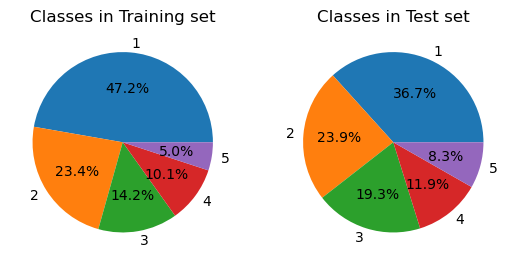

<Figure size 1000x2000 with 0 Axes>

In [63]:
train_labels = []
train_sizes = []
test_labels =[]
test_sizes =[]

for x, y in train.items():
    train_labels.append(x)
    train_sizes.append(y)

for x, y in test.items():
    test_labels.append(x)
    test_sizes.append(y)

fig, ax = plt.subplots(1, 2)
ax[0].pie(train_sizes, labels = train_labels, autopct='%1.1f%%')
ax[1].pie(test_sizes, labels = test_labels, autopct='%1.1f%%')
ax[0].set_title("Classes in Training set")
ax[1].set_title("Classes in Test set")

plt.figure(figsize= (10, 20))
plt.show()

In [48]:
# fig.savefig("biased_dataset.png")

# **Reference**
1. [Naive Bayes Classification](https://medium.com/@rangavamsi5/na%C3%AFve-bayes-algorithm-implementation-from-scratch-in-python-7b2cc39268b9)
2. [Gaussian Naive Bayes classification](https://medium.com/@rangavamsi5/na%C3%AFve-bayes-algorithm-implementation-from-scratch-in-python-7b2cc39268b9)
3. [Gaussian probability](https://levelup.gitconnected.com/classification-using-gaussian-naive-bayes-from-scratch-6b8ebe830266)
4. [sklearn GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
5. [classification performance calculation](https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/)
6. [PrettyTable](https://knight76.tistory.com/entry/python-pretty-table-%EC%82%AC%EC%9A%A9%EA%B8%B0)
7. [Debugging](https://chat.openai.com/c/dfc8e995-27d3-402a-b756-b20143860166)